In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score

In [18]:
# Load Dataset (Using second tab named 'data')
df = pd.read_excel("EastWestAirlines.xlsx", sheet_name="data")

In [19]:
print(df.head)

<bound method NDFrame.head of        ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0  

In [20]:
# Data Preprocessing
# Dropping missing values
df.dropna(inplace=True)

In [21]:
# Selecting numerical columns for clustering
num_cols = df.select_dtypes(include=[np.number]).columns

In [22]:
# Scaling features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[num_cols])

In [23]:
# K-Means Clustering
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

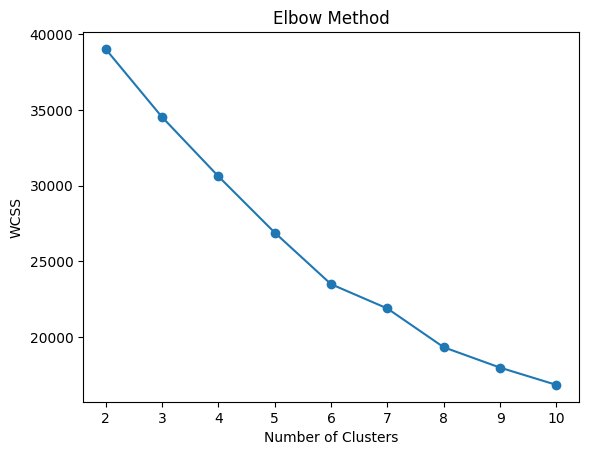

In [24]:
# Elbow Curve
plt.plot(range(2, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [25]:
# Applying K-Means with optimal K
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(df_scaled)

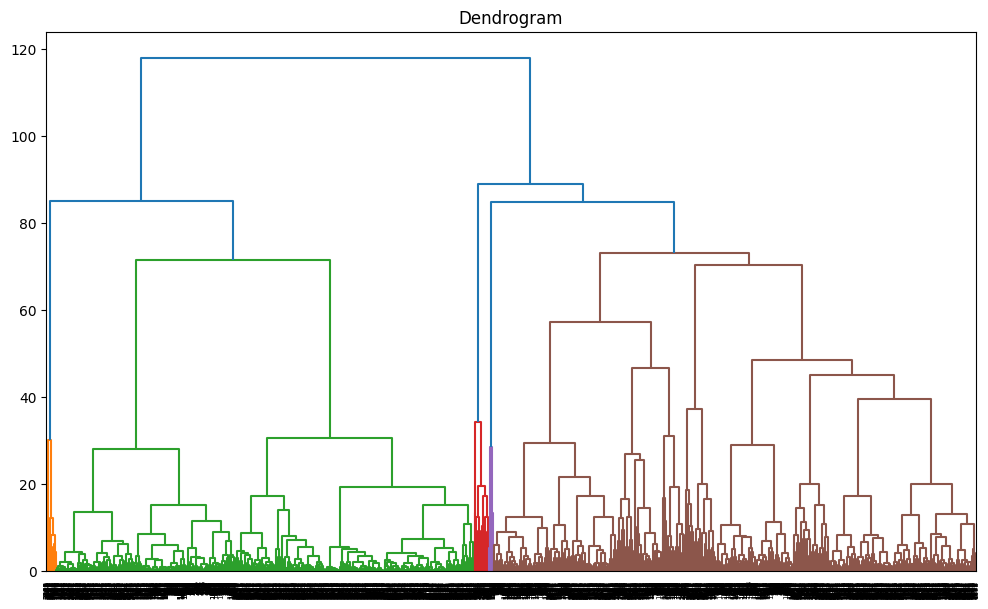

In [38]:
# Hierarchical Clustering
plt.figure(figsize=(12, 7))
dendro = linkage(df_scaled, method='ward')
dendrogram(dendro)
plt.title("Dendrogram")
plt.show()

In [31]:
# Assigning clusters from Hierarchical Clustering
df['Hierarchical_Cluster'] = fcluster(dendro, 4, criterion='maxclust')

In [32]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=1.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled)

In [33]:
# Silhouette Score Evaluation Metrics
kmeans_silhouette = silhouette_score(df_scaled, df['KMeans_Cluster'])
dbscan_silhouette = silhouette_score(df_scaled, df['DBSCAN_Cluster']) if len(set(df['DBSCAN_Cluster'])) > 1 else "N/A"

In [35]:
#Result
print("Silhouette Score - KMeans:", kmeans_silhouette)
print("Silhouette Score - DBSCAN:", dbscan_silhouette)

Silhouette Score - KMeans: 0.22808887010836637
Silhouette Score - DBSCAN: 0.1895328629344176


## Visualization of Clusters

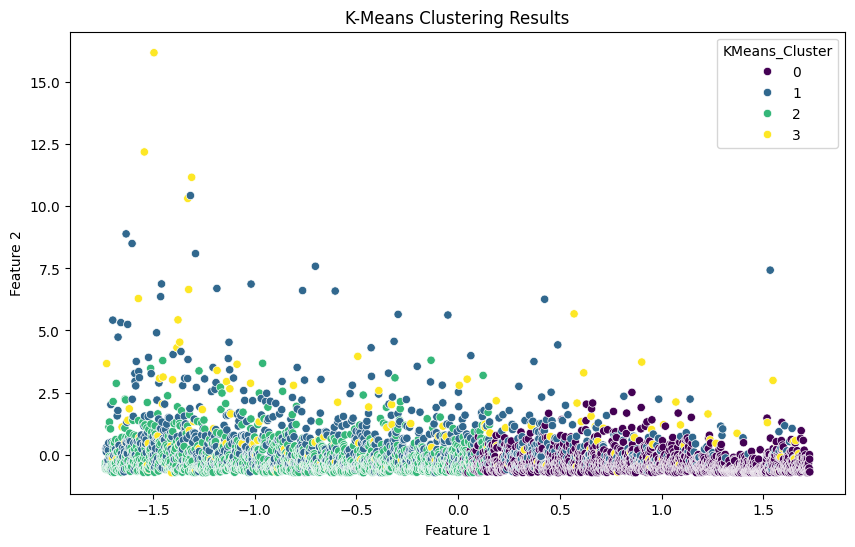

In [41]:
# Visualization of Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_scaled[:, 0], y=df_scaled[:, 1], hue=df['KMeans_Cluster'], palette='viridis')
plt.title("K-Means Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

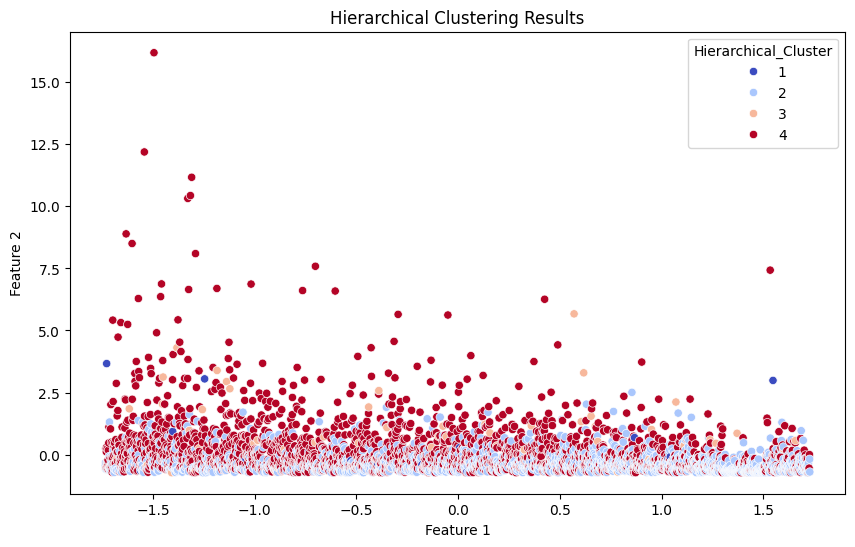

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_scaled[:, 0], y=df_scaled[:, 1], hue=df['Hierarchical_Cluster'], palette='coolwarm')
plt.title("Hierarchical Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

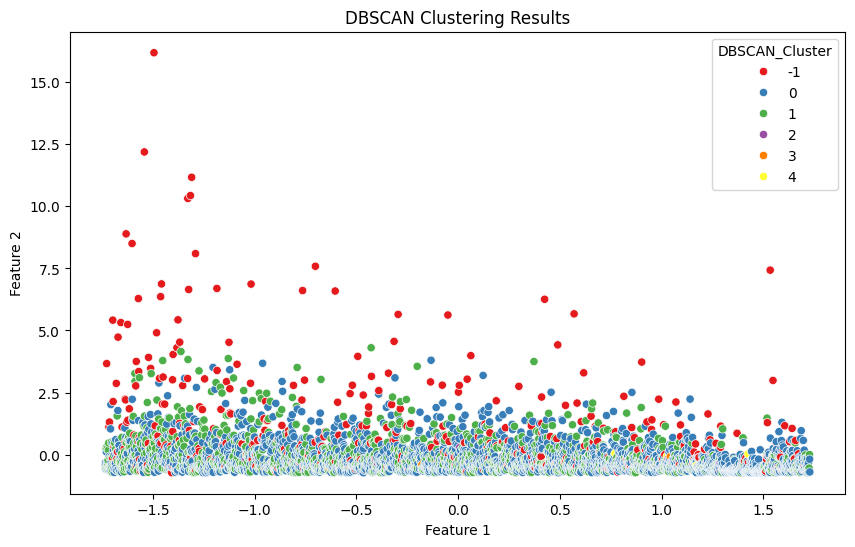

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_scaled[:, 0], y=df_scaled[:, 1], hue=df['DBSCAN_Cluster'], palette='Set1')
plt.title("DBSCAN Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# To Consolidate the above plots

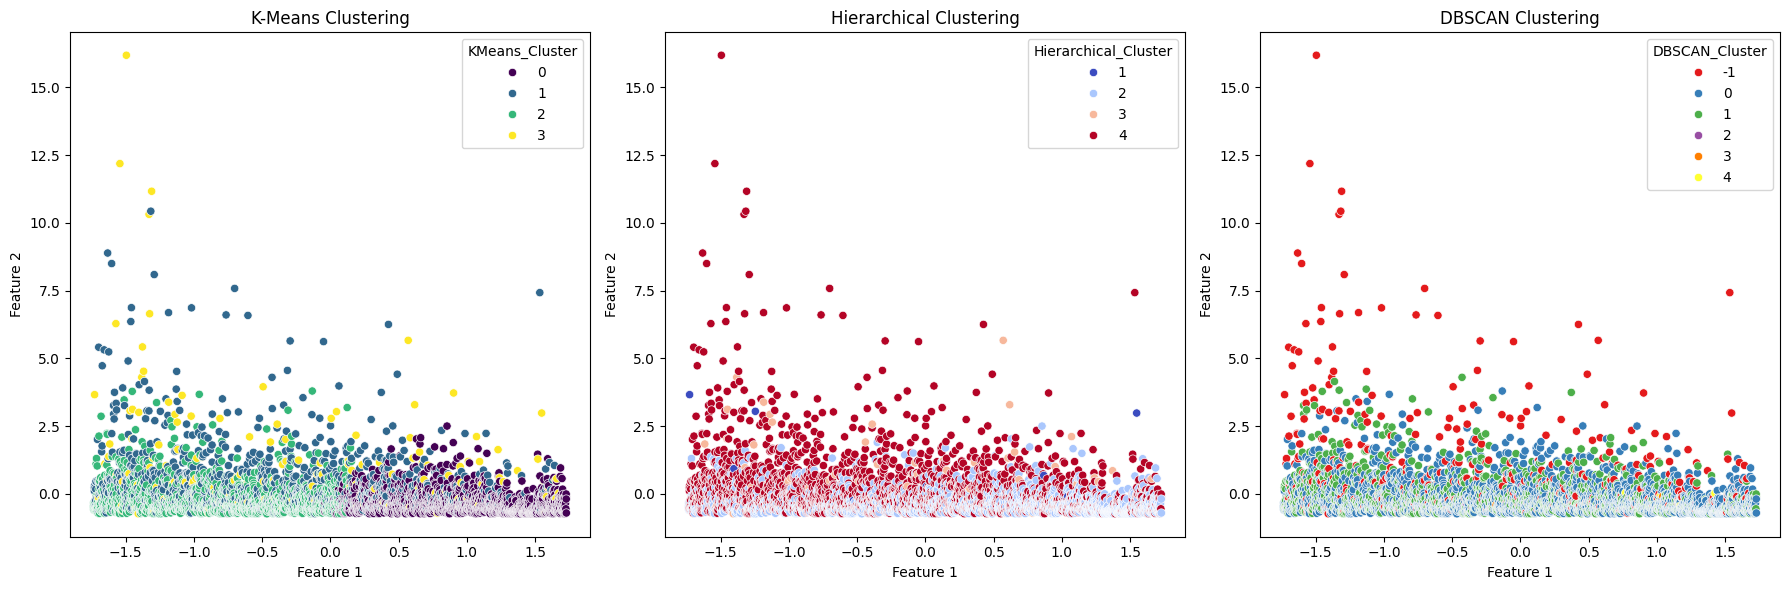

In [47]:
# Visualization of Clusters
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# K-Means Clustering Visualization
sns.scatterplot(x=df_scaled[:, 0], y=df_scaled[:, 1], hue=df['KMeans_Cluster'], palette='viridis', ax=axes[0])
axes[0].set_title("K-Means Clustering")
axes[0].set_xlabel("Feature 1")
axes[0].set_ylabel("Feature 2")

# Hierarchical Clustering Visualization
sns.scatterplot(x=df_scaled[:, 0], y=df_scaled[:, 1], hue=df['Hierarchical_Cluster'], palette='coolwarm', ax=axes[1])
axes[1].set_title("Hierarchical Clustering")
axes[1].set_xlabel("Feature 1")
axes[1].set_ylabel("Feature 2")

# DBSCAN Clustering Visualization
sns.scatterplot(x=df_scaled[:, 0], y=df_scaled[:, 1], hue=df['DBSCAN_Cluster'], palette='Set1', ax=axes[2])
axes[2].set_title("DBSCAN Clustering")
axes[2].set_xlabel("Feature 1")
axes[2].set_ylabel("Feature 2")

plt.tight_layout()
plt.show()
